[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/RecognitionAnalytics/pyFlammarion/blob/main/Tutorial.ipynb)

## Getting Started: Loading pyFlammarion and Dependencies

To begin working with AFM images, you'll first need to load the required libraries. This includes `pyFlammarion` for AFM file handling and processing, as well as standard scientific Python libraries such as `numpy` and `matplotlib` for data manipulation and visualization.

The code below checks if you're running in Google Colab and installs the latest version of `pyFlammarion` if needed. It then imports the main modules for file loading, flattening, plotting, and masking, ensuring you have all the tools necessary for AFM image analysis.

In [28]:
#get the latest version of pyFlammarion
import os
if "COLAB_GPU" in os.environ or "COLAB_TPU_ADDR" in os.environ:
    !pip install git+https://github.com/RecognitionAnalytics/pyFlammarion.git
    # In Colab, pip installs to /content, so get the path to the cloned repo
    for p in sys.path:
        if "pyFlammarion" in p:
            pyflammarion_path = p
            break
    print("pyFlammarion path:", pyflammarion_path)
else:
    pyflammarion_path = os.getcwd()
    
print("pyFlammarion path:", pyflammarion_path)    

import matplotlib.pyplot as plt
import numpy as np
from pyFlammarion import FmFiles, FmFlattening, FmPlotting, FmMasking
from pyFlammarion.FileLoaders.FlammarionFile import FlammarionFile
import os
import sys

pyFlammarion path: d:\PythonProj\AFM_Tools


# Loading AFM Images with pyFlammarion

The code loads an Atomic Force Microscopy (AFM) image using the pyFlammarion library, which provides tools for handling various microscopy file formats.

Key steps:
- First, the library is imported with its key modules for file handling, flattening, and plotting
- The `FmFiles.loadFile()` function loads an AFM image from the specified path
- The loaded image is stored in the `image` variable as a FlammarionFile object
- The code also demonstrates how to save the loaded image in Gwyddion format using `FmFiles.saveFile()`

pyFlammarion supports multiple file formats, which can be checked using the `knownLoadFileTypes()` and `knownSaveFileTypes()` functions.

Files pyFlammarion can read:
['.mi', '.ibw', '.jpk', '.gwy']

Files pyFlammarion can write:
['.mi', '.ibw', '.jpk', '.gwy']

Loaded d:\PythonProj\AFM_Tools/examples/E5__240703_114329.mi with .mi loader
Topography : Trace
CSAFM/Aux_BNC : Trace
Amplitude : Retrace
Phase : Trace
Image loaded: 
FlammarionFile: d:\PythonProj\AFM_Tools/examples/E5__240703_114329.mi
Dataset: E5__240703_114329
Resolution: 512x512
Physical Size: 9.493e-06x9.493e-06 m

Images (4):
  1. Topography_Trace (m)
  2. CSAFM/Aux_BNC_Trace (V)
  3. Amplitude_Retrace (V)
  4. Phase_Trace (deg)

Metadata:
  version: PicoView 0x10c04
  dateAcquired: Wed Jul 03 11:43:29 2024
  dateModified: Wed Jul 03 11:43:29 2024
  mode: ACAFM
  xSensitivity: 2.2649999999999998e-08
  xNonlinearity: 5.9999999999999995e-05
  xHisteresis: 2.2
  xRestPosition: 0.0
  ySensitivity: 2.484e-08
  yNonlinearity: 0.00011
  yHisteresis: 1.5
  yRestPosition: 0.0
  zSensitivity: 5.16e-09
  zSensorSens: 5e-06
  preampSens: 1e-09
  reverseX: False
  rever

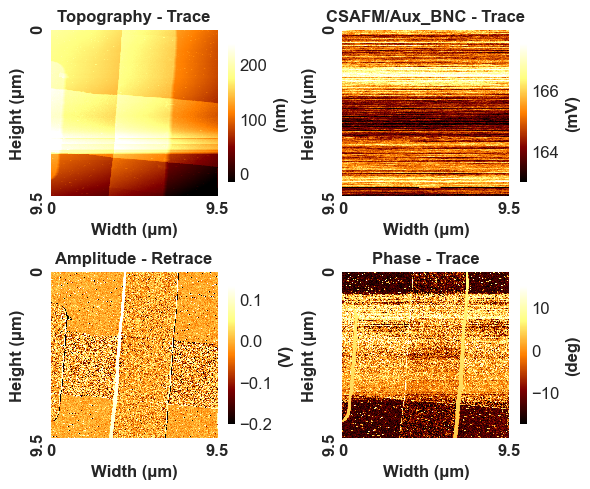

In [30]:
print('Files pyFlammarion can read:')
print(FmFiles.knownLoadFileTypes())
print('\nFiles pyFlammarion can write:')
print(FmFiles.knownSaveFileTypes())
print()
image:FlammarionFile =  FmFiles.loadFile(f'{pyflammarion_path}/examples/E5__240703_114329.mi' , verbose=True)   
print('Image loaded:', image)


FmPlotting.AFMPlot(image, figsize=(6,5))

# Working with AFM Image Files

## Image File Operations

pyFlammarion provides two main approaches for saving your AFM data:

1. **Save AFM Data Files** using `FmFiles.saveFile(filename, image)` 
    - The file format is determined by the extension you provide
    - Supports multiple formats including Gwyddion (.gwy), ASCII (.txt), and others

2. **Save Visualizations** using `FmPlotting.AFMPlot(..., saveFile='filename')`
    - Creates publication-quality images from your AFM data
    - File format is determined by the extension (e.g., .png,  .svg)

## Vector vs. Raster Output

For publication-quality figures:
- **SVG files** (.svg) are vector-based and can be edited with vector graphics editors like Inkscape
- SVG maintains quality at any zoom level and is ideal for publications
- Vector graphics allow individual elements to be modified separately

For web display or quick sharing:
- **PNG files** (.png) offer good quality raster images
 

Save AFM image to Gwyddion file format

Save graph to svg file


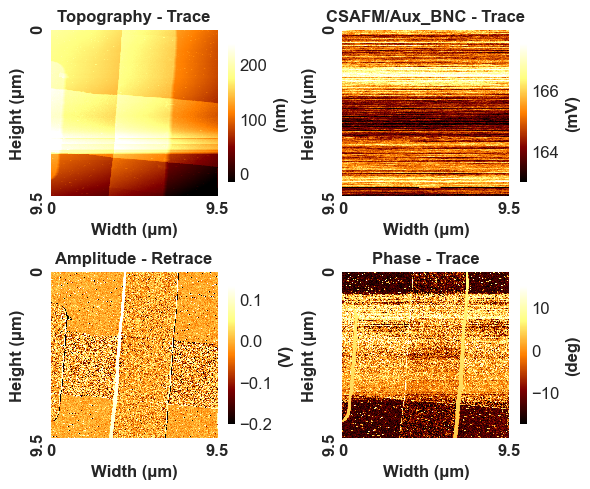

In [3]:
print('Save AFM image to Gwyddion file format')
FmFiles.saveFile(  './test.gwy', image)
print('\nSave graph to svg file')
FmPlotting.AFMPlot(image, figsize=(6,5), saveFile='./test.svg')



# Image Flattening in AFM Analysis

## Understanding AFM Image Flattening

Flattening is a critical processing step for atomic force microscopy (AFM) images that removes artifacts and background trends to reveal true surface features. pyFlammarion offers multiple flattening methods, each suited for different sample types:

### Line Flattening Methods
- **MedianLine**: Removes line-by-line offsets using median values
- **TrimmedMeanLine**: Uses trimmed means to avoid outlier influence
- **ModusLine**: Based on the most frequent value in each scan line
- **MatchingLine**: Aligns adjacent scan lines for continuity
- **PolynomialLine**: Fits polynomial functions to each scan line
- **TerraceLine**: Specialized for samples with flat terraces

### Plane Flattening Methods
- **FacetLevelTiltPlane**: Removes overall tilt across the entire image
- **PlaneLevel**: Fits and subtracts a plane from the entire image
- **ThreePointPlane**: Defines a plane using three user-selected points
- **polynomialPlaneFlattening**: Fits higher-order polynomial surfaces
- **TerracePlanes**: Optimized for samples with multiple flat regions

### Other Methods
- **Zero**: Sets the minimum height to zero
- **ZeroFloor**: Sets the lowest plane to zero (pits will go below the level)

## Choosing the Right Flattening Method

We use a fairly difficult surface with multiple scanning artifacts as well as large features to show the possible flattening techniques, normally a combination of methods will be needed

The cell below demonstrates applying multiple flattening techniques to compare their effects on the same AFM image.

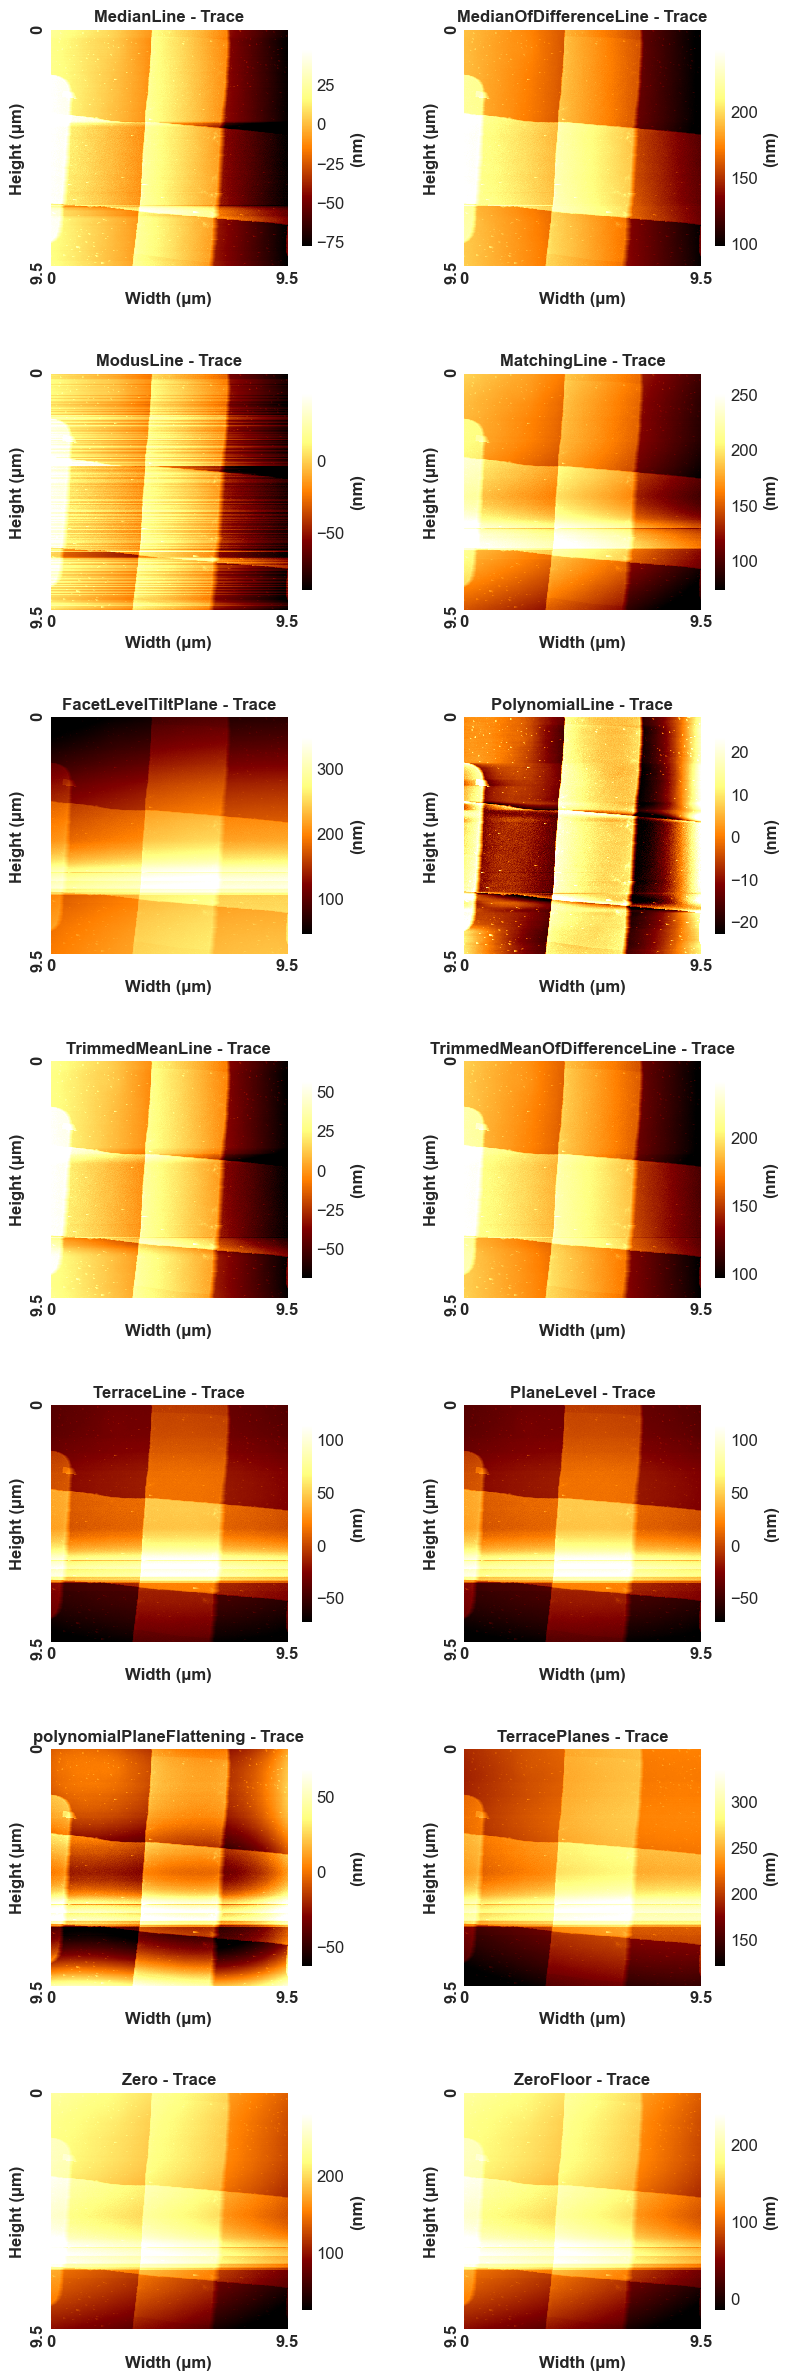

In [ ]:
image:FlammarionFile =  FmFiles.loadFile(f'{pyflammarion_path}/examples/E5__240703_114329.mi' )   

#create a container for the flattened images that still has all the metadata from the original image
#we do not want the old images (other modes than topography) to be copied
flattenedFile = image.shallowCopy(copyImages=False)

#we will walk through all the flattening methods and apply them to the topography image
#normally you would only use one flattening method, there will be an example for that later
for flatteningMethod in FmFlattening.AFMFlatteningMethod:
    
    #three point flattening requires use input of three points, so we skip it here
    if flatteningMethod == FmFlattening.AFMFlatteningMethod.ThreePointPlane:
        continue
    
    #make a copy of the topography image from the loaded file, that we can flatten
    topographyCopy = image["Topography_Trace"].deepCopy()
    
    #flatten the image using the current flattening method
    flatTopography = FmFlattening.FlattenImage(topographyCopy, flatteningMethod)
    
    #give the flattened image a new name 
    flatTopography.label = flatteningMethod.name
    
    #add the flattened image to the output file container
    flattenedFile.addImage(flatTopography )
    
#show all the flattened images in a single plot (specify the size to make it look nice)    
FmPlotting.AFMPlot(flattenedFile, figsize=(8,24) )

# Stacking Flattening Techniques for AFM Image Correction

AFM images often contain multiple types of artifacts, such as line-by-line offsets (line artifacts) and overall plane tilts, caused by feedback or piezo drift. To achieve optimal flattening, you can **stack multiple flattening techniques** in sequence, each targeting a specific artifact:

1. **Remove Line Artifacts First**  
    Apply a line-based flattening method (e.g., `TrimmedMeanOfDifferenceLine`, `MedianLine`, or `PolynomialLine`) to correct for horizontal or vertical line artifacts introduced during scanning.

2. **Correct Plane Tilt or Background**  
    After line artifacts are removed, use a plane-based flattening method (e.g., `TerracePlanes`, `PlaneLevel`, or `FacetLevelTiltPlane`) to subtract any remaining tilt or background curvature from the image.

3. **Zero the Image Floor (Optional)**  
    For some analyses, it is useful to set the lowest point in the image to zero using the `ZeroFloor` method.

**Example Workflow:**
1. Start with your raw topography image (`Topography_Trace`).
2. Apply a line flattening method:
    - `terraceFlat = FmFlattening.FlattenImage(Topography_Trace, FmFlattening.AFMFlatteningMethod.TrimmedMeanOfDifferenceLine)`
3. Apply a plane flattening method:
    - `terraceFlat = FmFlattening.FlattenImage(terraceFlat, FmFlattening.AFMFlatteningMethod.TerracePlanes, polyDegree=4, limitPercent=0.6)`
4. Optionally, zero the image:
    - `terraceFlat = FmFlattening.FlattenImage(terraceFlat, FmFlattening.AFMFlatteningMethod.ZeroFloor)`

**Tip:**  
Stacking methods in this order ensures that each artifact is addressed without introducing new distortions. Experiment with different combinations and parameters to best suit your sample and imaging conditions.

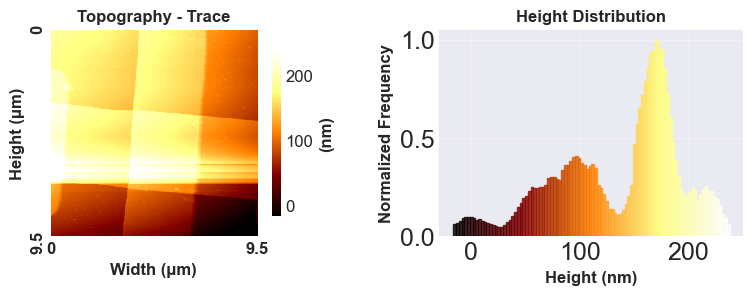

Flattened image with clear terraces in the histogram and removed AFM line artifacts


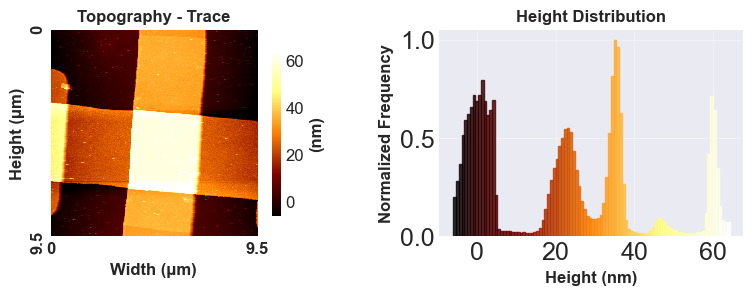

In [ ]:
image:FlammarionFile =  FmFiles.loadFile(f'{pyflammarion_path}/examples/E5__240703_114329.mi' )   

#create a container for the flattened images that still has all the metadata from the original image
#we do not want the old images (other modes than topography) to be copied

Topography_Trace= image["Topography_Trace"].deepCopy()
FmPlotting.AFMPlot(Topography_Trace,   show_histogram=True, figsize=(4,3)  ) 

#Remove the AFM line artifacts, without creating false features in the image (common in polynomial line flattening)
terraceFlat = FmFlattening.FlattenImage(Topography_Trace, FmFlattening.AFMFlatteningMethod.TrimmedMeanOfDifferenceLine)

#terrace planes will attempt to flatten the background with a polynomial plane, despite large flattened areas being present
#additional parameters can be used to control the flattening, such as the polyDegree(polynomial degree) 
#and limitPercent (percentage of the image to use for the polynomial fit)
terraceFlat = FmFlattening.FlattenImage(terraceFlat,  FmFlattening.AFMFlatteningMethod.TerracePlanes,
                                        polyDegree=4, limitPercent=0.6 )

#zero the image to the floor
terraceFlat = FmFlattening.FlattenImage(terraceFlat, FmFlattening.AFMFlatteningMethod.ZeroFloor)    

#put the flattened image into the original image container so it can be saved
image["Topography_Trace"] = terraceFlat

print('Flattened image with clear terraces in the histogram and removed AFM line artifacts')
#show the flattened image and the histogram to examine the terraces and their heights
FmPlotting.AFMPlot(terraceFlat,   show_histogram=True, figsize=(4,3)  ) 

# Masking in AFM Image Analysis

## What is Masking and Why Use It?

**Masking** in Atomic Force Microscopy (AFM) image analysis refers to the process of identifying and excluding specific regions of an image from further analysis or processing. This is typically done by creating a binary or logical mask—a 2D array where pixels to be included are marked as `1` (or `True`) and those to be excluded are marked as `0` (or `False`).

### Reasons to Use Masking:
- **Exclude Artifacts:** Remove regions affected by imaging artifacts (e.g., streaks, spikes, or edge effects) to prevent them from biasing quantitative analysis.
- **Focus on Regions of Interest:** Analyze only relevant features, such as particles or terraces, while ignoring background or damaged areas.
- **Improve Flattening and Filtering:** Masking problematic areas can improve the performance of flattening algorithms and other image processing steps.
- **Prepare for Quantitative Analysis:** Ensure that only valid data contributes to measurements like roughness, particle size, or height distributions.

---

## Masking Techniques in pyFlammarion

pyFlammarion provides several automated masking methods, each targeting specific types of features or artifacts:

- **HighPoints:** Masks the highest regions in the image, often corresponding to dust, debris, or tall particles that may not be relevant to surface analysis.
- **StreakMask:** Detects and masks streak artifacts, which are typically caused by scanning errors or feedback instability.
- **TrimmedMean:** Identifies and masks outliers based on a trimmed mean filter, helping to exclude extreme values that could skew analysis.
- **ParticleDetection:** Automatically detects and masks particles or features that stand out from the background, useful for isolating or excluding them.
- **Unsmoothable:** Masks regions that cannot be smoothed by standard filters, often indicating severe artifacts or damage.
- **EdgeArtifacts:** Masks the edges of the image where the tip may have been reacting to an edge or sharp feature.
- **SpikeArtifacts:** Detects and masks sharp, isolated spikes in the data, which are usually noise or unusually large features.
- **LowPoints:** Masks the lowest regions in the image, such as pits or holes, which may be irrelevant or problematic for certain analyses.
- **SharpEdges:** Identifies and masks regions with abrupt height changes, which can indicate defects, scratches, or boundaries between different materials.

---

By applying these masking techniques, you can tailor your AFM image analysis to focus on high-quality, artifact-free data, leading to more accurate and reliable results.

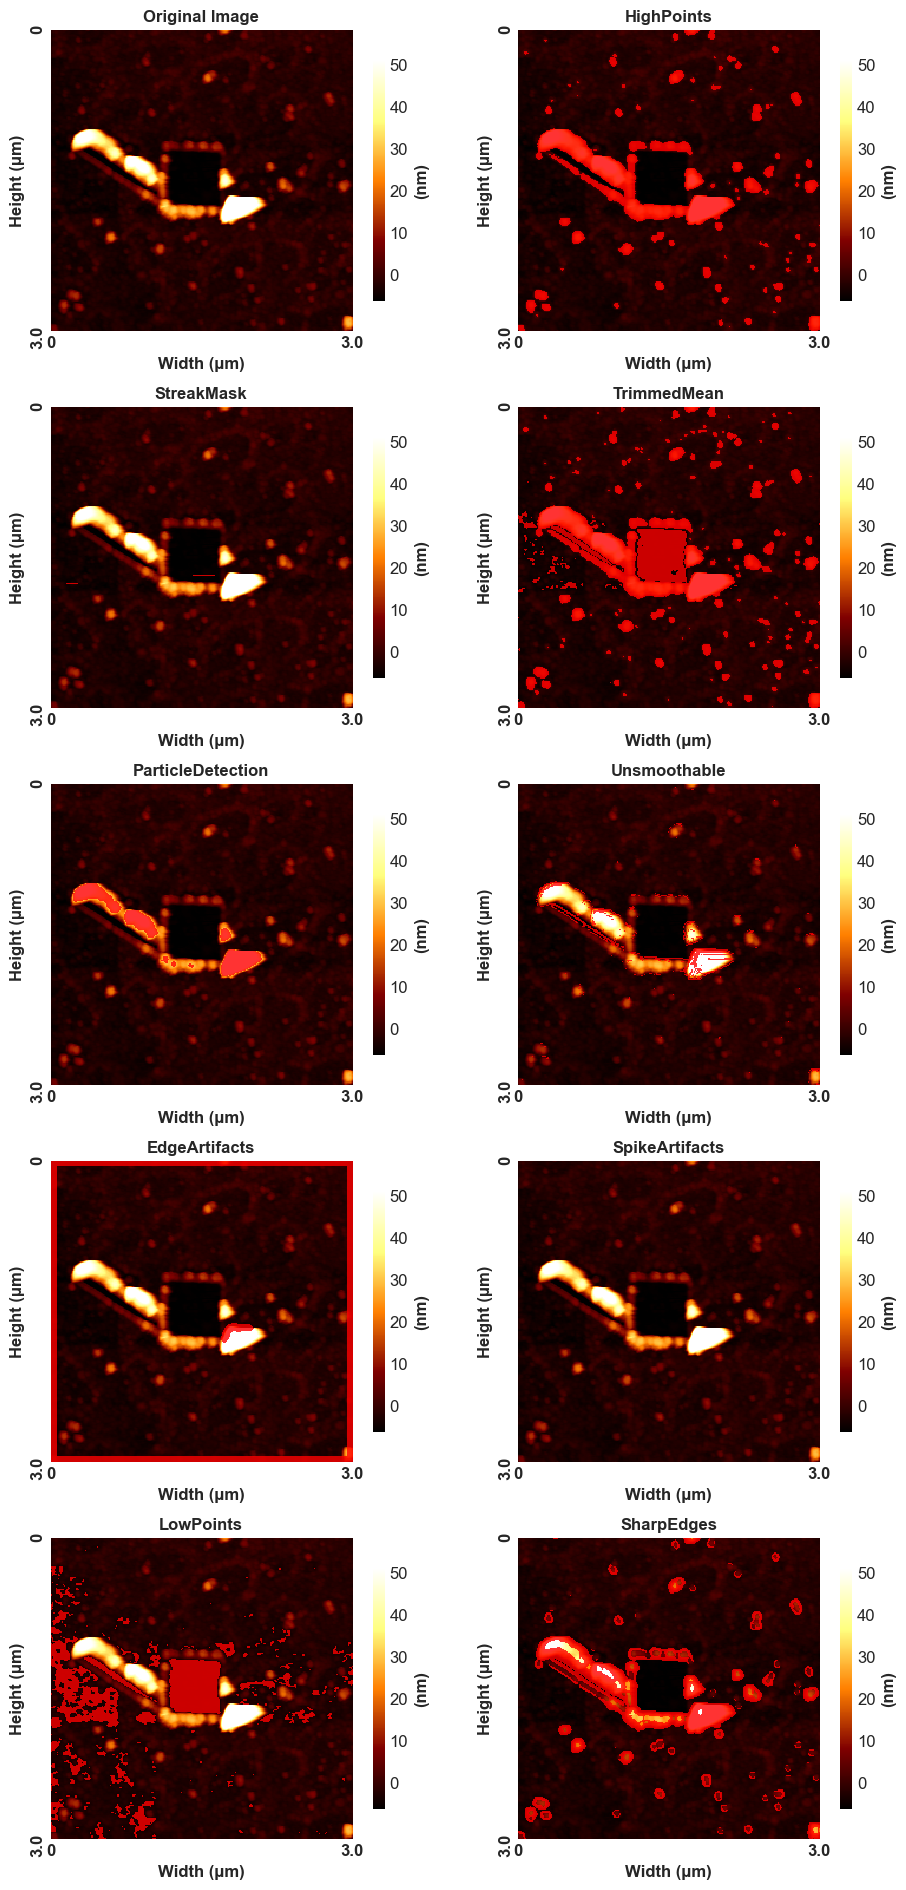

In [ ]:


image:FlammarionFile =  FmFiles.loadFile(f'{pyflammarion_path}/examples/Disk_250509_164728.mi' )   


#outputs will be a list of 2D arrays as masks.  Masks can be used to hide problem areas in the image for 
#later processing, or to help get nice level images for analysis

masks  = [] #collections of 2D arrays as masks 


#name of the mask for plotting
maskNames = []

#getting rid of the line artifacts and a simple plane subtraction in the image will improve the quality of the masks
terraceFlat = FmFlattening.FlattenImage(image["Topography_Trace"].deepCopy(), FmFlattening.AFMFlatteningMethod.MedianOfDifferenceLine)
terraceFlat = FmFlattening.FlattenImage(terraceFlat, FmFlattening.AFMFlatteningMethod.PlaneLevel)

#walk through all the masking methods and apply them to the image
#normally you would only use one masking method, there will be an example for that later 
for maskingMethod in FmMasking.AFMMaskMethods:
    mask = FmMasking.MaskImage(terraceFlat, maskingMethod)
     
    #keep track of the name and the mask
    maskNames.append(maskingMethod.name)
    masks.append(mask)
    
    
fig,axs = plt.subplots(int( np.ceil( len(masks)/2+.1)),2, figsize=(9.5, 2*len(masks)+1))
axs=axs.flatten()

FmPlotting.AFMPlot( terraceFlat, title = 'Original Image', mask =None,fig=fig,  ax=axs[0] )
cc=1
for i, mask in enumerate(masks):
    ax=axs[cc]
    FmPlotting.AFMPlot( terraceFlat, title = maskNames[i], mask =mask,fig=fig,  ax=ax )
    cc+=1
    
plt.tight_layout()
plt.show()

## Mask-Assisted Flattening with Trimmed Mean Mask

This example demonstrates how to use the **Trimmed Mean** mask to identify and exclude high spots that typically introduce artifacts when using standard polynomial line flattening on AFM images. By masking these problematic regions before flattening, the resulting image is significantly improved—yielding an almost perfectly flat surface compared to the unmasked approach.

- **Left:** Polynomial line flattening without masking shows visible artifacts due to high spots.
- **Right:** Mask-assisted flattening (using the trimmed mean mask) effectively removes these artifacts, resulting in a much flatter image.

This workflow is especially useful for samples with terraces or isolated features that would otherwise distort background correction.

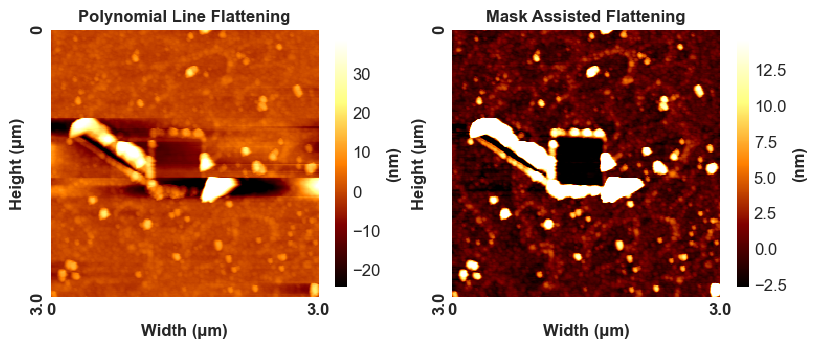

In [ ]:
image:FlammarionFile =  FmFiles.loadFile(f'{pyflammarion_path}/examples/Disk_250509_164728.mi' )   


#getting rid of the line artifacts and a simple plane subtraction in the image will improve the quality of the masks
planeFlat = FmFlattening.FlattenImage(image["Topography_Trace"].deepCopy(), FmFlattening.AFMFlatteningMethod.MedianOfDifferenceLine)
planeFlat = FmFlattening.FlattenImage(planeFlat, FmFlattening.AFMFlatteningMethod.PlaneLevel)


#create a flattened image with no mask, which is prone to problems with high spots
noMask =FmFlattening.FlattenImage(planeFlat.deepCopy(), FmFlattening.AFMFlatteningMethod.PolynomialLine, 
                                        degree=3,   fit_method=FmFlattening. RegressionMethod.ABSOLUTE_DEVIATION )

#we will use the trimmed mean method to get a mask of the terraces
#trimmed factor is the percentage of the image to remove for the mean calculation
#MAD factor is the number of deviations to use for the mask
mask = FmMasking.MaskImage(planeFlat, FmMasking.AFMMaskMethods.TrimmedMean,trim_factor=.25, MAD_factor=2)

#now do a polynomial fit to the image, which is prone to problems with high spots, to flatten the image
planeFlat = FmFlattening.FlattenImage(planeFlat, FmFlattening.AFMFlatteningMethod.PolynomialLine, 
                                        degree=3, mask =mask, fit_method=FmFlattening. RegressionMethod.ABSOLUTE_DEVIATION )

#show a comparison of the two methods 
fig,axs = plt.subplots(1,2, figsize=(9.5, 4))
FmPlotting.AFMPlot( noMask, title = 'Polynomial Line Flattening', fig=fig,  ax=axs[0] )
FmPlotting.AFMPlot(planeFlat, title = 'Mask Assisted Flattening', fig=fig,  ax=axs[1], vrange = (3,95) )
plt.show()
 